<a href="https://colab.research.google.com/github/R3h2/loadedburger/blob/main/Task_1_data_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd


1_تجمع مجموعة البيانات هذه معلومات من 100 ألف موعد طبي يركز على مسألة ما إذا كان المرضى سيحضرون لمواعيدهم أم لا. السؤال الرئيسي الذي نحاول الإجابة عنه هنا هو لماذا يتغيب 30٪ من المرضى عن موعدهم المحدد.
نحاول التكهن بأهم العوامل التي تؤثر على حضور المريض هل نوع المرض يؤثر على المريض
  اظهر؟

الاسباب ممكن تكون :
نسيان الموعد: نسيان الموعد أو تخطي التخطيط.

صعوبة الوصول: مشاكل في النقل أو المسافة البعيدة.

التزامات شخصية: التزامات عائلية أو شخصية تعوق الحضور.

المشاكل المالية: تكاليف العلاج أو التنقل.

القلق والخوف: خوف من الكشف عن مشاكل صحية أخرى.

نقص التوعية: عدم فهم أهمية الحضور والالتزام.

العوامل النفسية: القلق والاكتئاب وتأثيرها على الحضور.

عدم تلقي التذكير: عدم تلقي تذكير بالموعد

In [11]:
data = pd.read_csv('/content/drive/MyDrive/data/4i5EyV7jQ5vUvYGMYwJFTyHqV1BL3I8AAfdsBvHR (2).csv')

In [21]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
import numpy as np
from google.colab import autoviz
df_5556215226650877033 = autoviz.get_df('df_5556215226650877033')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5556215226650877033, *['Gender', 'ScheduledDay'], **{})
chart

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/data/4i5EyV7jQ5vUvYGMYwJFTyHqV1BL3I8AAfdsBvHR (2).csv')  # Replace with your dataset
X = data[['Age', 'Gender']]
y = data['No-show']

In [31]:
#import the liberaries that we need for analysis
import pandas as pd                  #for dealing with dataframs
import numpy as np                   #for scientific compution and arraies
import matplotlib.pyplot as plt      #fro visualization
import seaborn as sns                #fro better visualization
%matplotlib inline

In [36]:
df = pd.read_csv("/content/drive/MyDrive/data/4i5EyV7jQ5vUvYGMYwJFTyHqV1BL3I8AAfdsBvHR (2).csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
df.shape

(110527, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [39]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [83]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.026157,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.400079,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,120.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1447362522691520473, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1447362522691520473, *['Scholarship'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1447362522691520473, *['Hipertension'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1447362522691520473, *['Diabetes'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1447362522691520473, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1447362522691520473, *['Scholarship'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1447362522691520473, *['Hipertension'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1447362522691520473, *['Diabetes'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1447362522691520473 = autoviz.get_df('df_1447362522691520473')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1447362522691520473, *[[['Age', 'Scholarship'], ['Scholarship', 'Hipertension'], ['Hipertension', 'Diabetes'], ['Diabetes', 'Alcoholism']]], **{})
chart

In [41]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [42]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [43]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


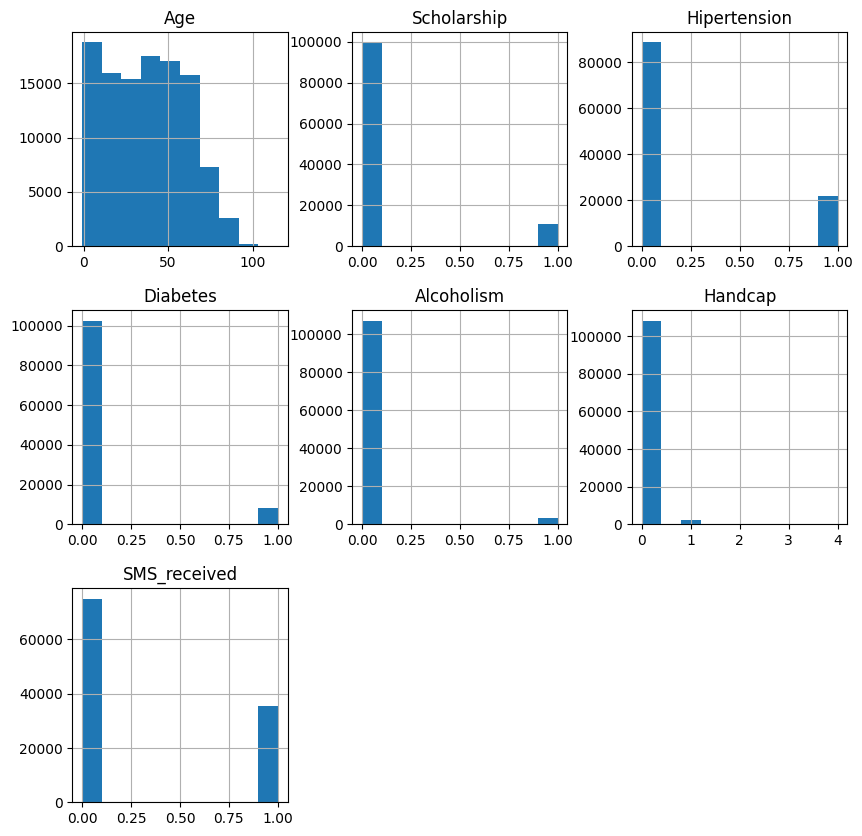

In [44]:
df.hist(figsize=(10,10));

In [45]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [46]:
df = df.rename(columns={'No-show':'Absent'})
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'Absent'],
      dtype='object')

1. هل هناك علاقة بين جنس المريض والحضور؟

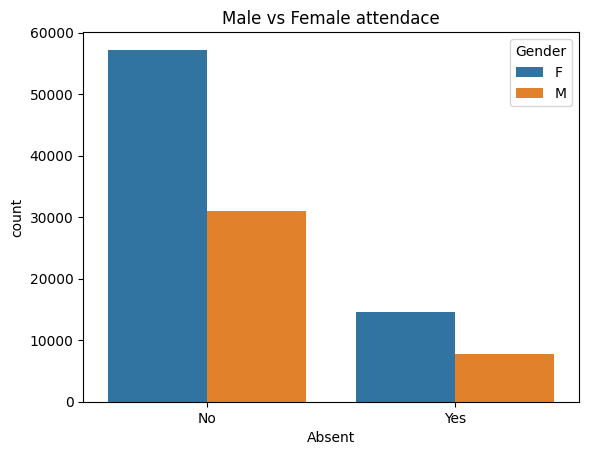

In [47]:
sns.countplot(x=df['Absent'], hue=df['Gender']);
plt.title('Male vs Female attendace');

2. هل يؤثر الحي دورًا في عدم حضور المرضى؟


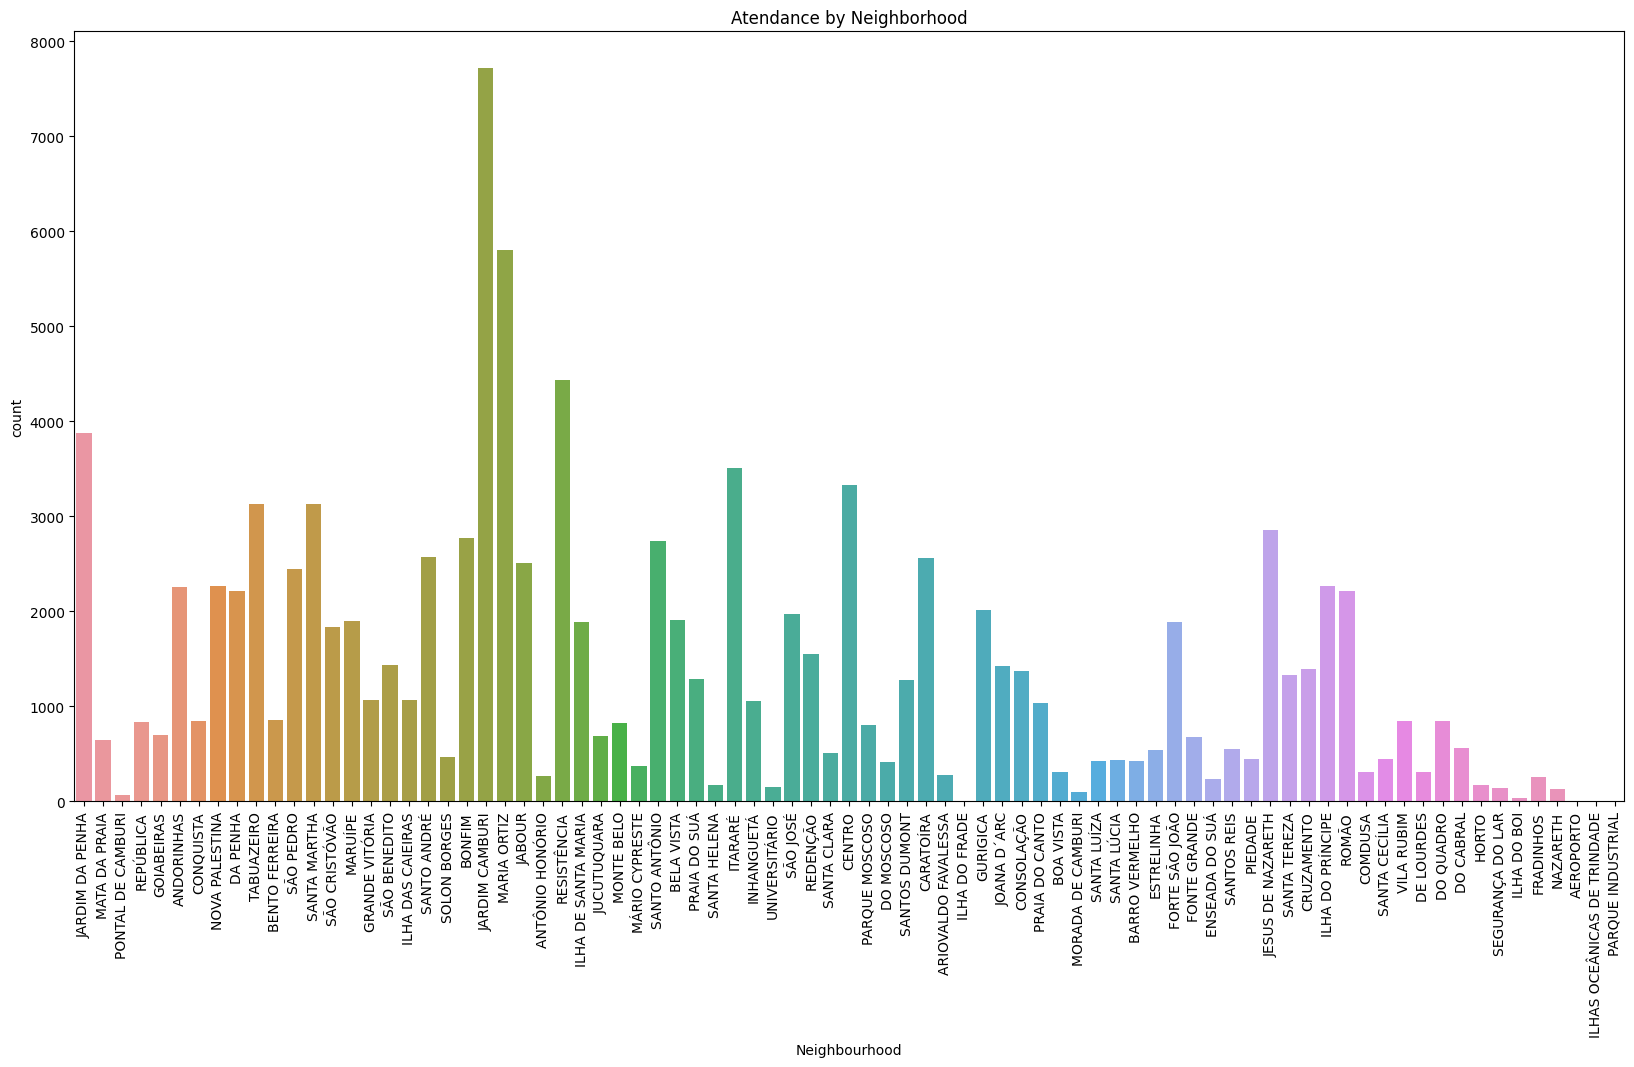

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.Neighbourhood);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=90);

نرى أن بعض الأحياء بها المزيد من الأشخاص يحضرون لمواعيدهم وهذا يشير إلى أن هذه المنطقة بها زيادة في الأمراض

وش المرضى اللي يظهرون أكثر؟ شباب ام شياب

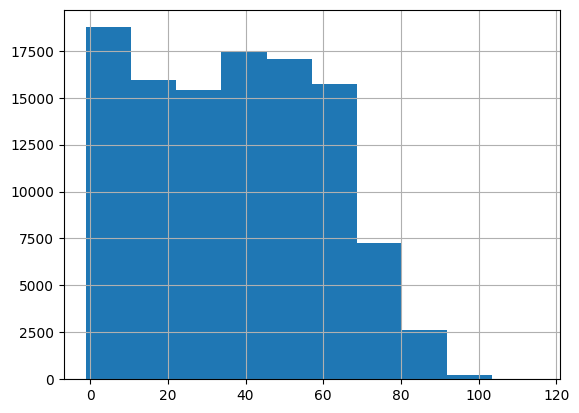

In [49]:
df['Age'].hist(bins=10);


In [50]:
df['Age'] = [round(a,-1) for a in df['Age']]  # this trick makes age easier as I divided them into segments to make
                                                #it easier visualizing
df['Age'].value_counts()

40     15960
60     15628
20     15342
50     14012
30     13026
0      11732
10     11526
70      7365
80      4776
90      1090
100       65
120        5
Name: Age, dtype: int64

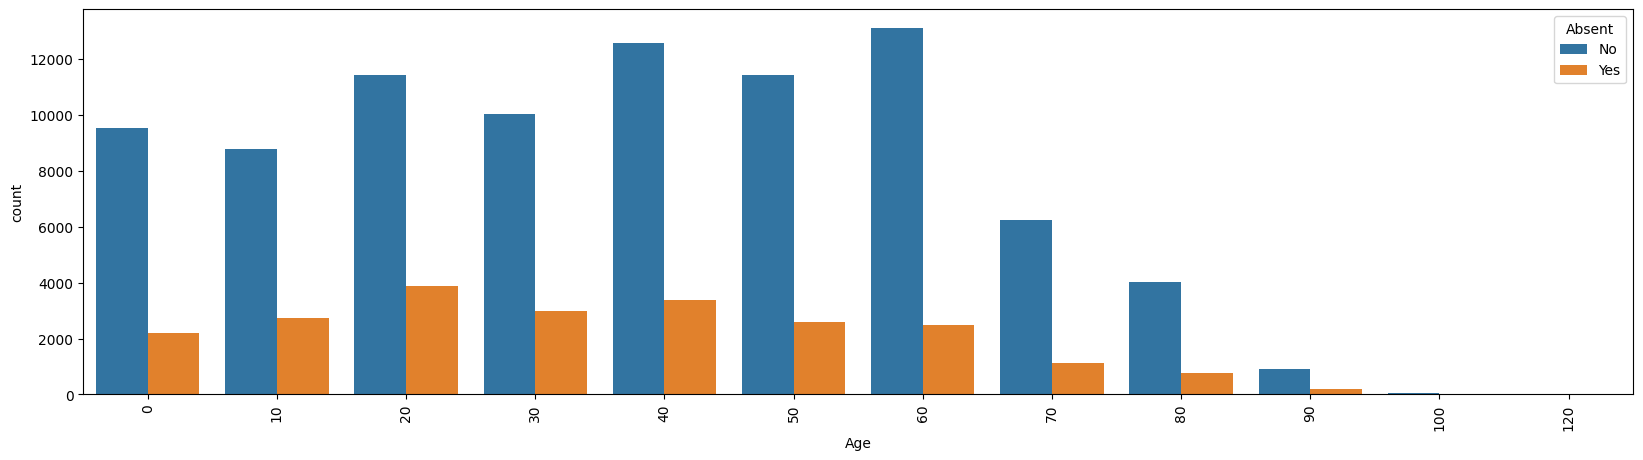

In [51]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'], hue=df['Absent'])
plt.xticks(rotation=90);

يفوز زمن الشباب بالامراض من كثره الهموم من كيسي

نوع المرض اللي يأثر على المريض3-

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  Absent          110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [58]:
disease_columns = df[['Diabetes','Alcoholism']]

KeyError: ignored

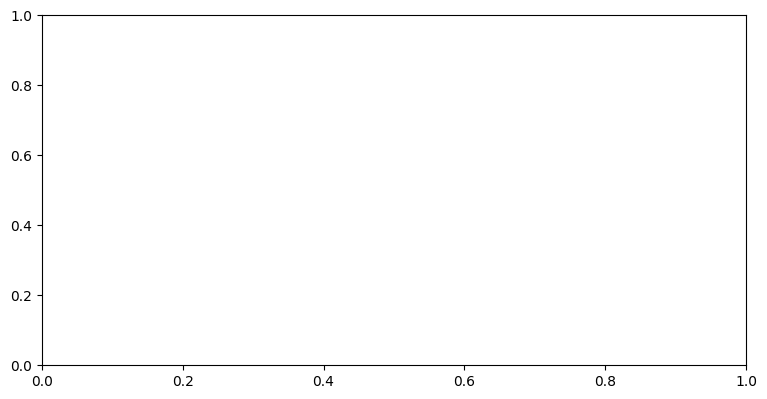

In [90]:
plt.figure(figsize=(20,10));
plt.subplot(2,2,1)
df.iloc(disease_columns['Hypertension'],hue=df['Absent'])
plt.subplot(2,2,2)
df.iloc(disease_columns['Diabetes'],hue=df['Absent'])
plt.subplot(2,2,3)
df.iloc(disease_columns['Alcoholism'],hue=df['Absent'])
plt.subplot(2,2,4)

In [91]:
<matplotlib.axes._subplots.AxesSubplot at 0x7f7ce1d90950>


SyntaxError: ignored

هنا نلاحظ ان ارتفاع الدم هو الشائع وسبب عدم حضور الموعد ممكن بسبب شعورهم بأنهم بخير وقتها